In [13]:
%matplotlib inline
import sys,os
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import h5py
import pandas as pd
import matplotlib.gridspec as gridspec

### Input data

In [18]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_4yrs/Validation_data_2019.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp = np.array(hdf.get('air temperature [K]'))
    wind_speed = np.array(hdf.get('Wind speed at 10 m (m/s)'))
    ppt_rain = np.array(hdf.get('precipitation rain [m s^-1]'))
    rel_hum = np.array(hdf.get('Relative humidity at 5 m (%)'))
    inc_sw = np.array(hdf.get('Incoming shortwave radiation (W/m^2)'))

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))


List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Soil temperature at - 0.00 m [K]', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'time [s]']




In [21]:
time_days = np.arange(0,365,1)

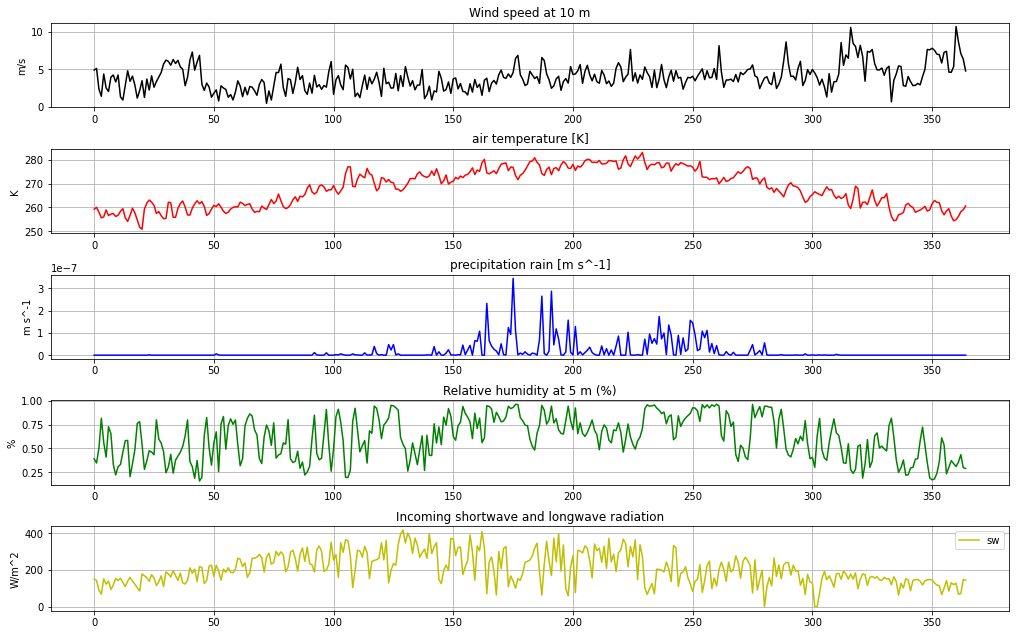

In [23]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(time_days, wind_speed, 'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('air temperature [K]')
f2_ax2.plot(time_days, air_temp,  'r',label='air temperature [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(time_days, ppt_rain,  'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(time_days, rel_hum,  'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave and longwave radiation')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(time_days, inc_sw,  'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

### Case5_perm_transect_final_su

In [14]:
df_sim = pd.read_csv('Case5_perm_transect_final_su.demo/observation_column_all.dat',skiprows=70, sep=',',index_col="time [d]")
df_sim.head()

,water content [mol],surface water content [mol],snow water content [mol],evaporation [m s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],molar density liquid [mol m^-3],surface area [m^2],snow melt [m s^-1],surface temperature [K]
time [d],,,,,,,,,,,
0.0,1.072370e+09,3.243519e+09,1.664696e+06,0.000000,0.000000e+00,0.0,0.0,55489.880101,1500.0,0.0,268.451320
1.0,1.072370e+09,3.243049e+09,7.810365e+05,0.006703,-5.017946e-06,0.0,0.0,55485.988617,1500.0,0.0,268.002060
2.0,1.072370e+09,3.242344e+09,6.389919e+05,0.008644,-1.363656e-06,0.0,0.0,55478.122643,1500.0,0.0,267.182804
3.0,1.072370e+09,3.241550e+09,4.262876e+05,0.009793,5.295416e-07,0.0,0.0,55467.392905,1500.0,0.0,266.205481
4.0,1.072370e+09,3.240788e+09,3.256437e+05,0.009280,-2.460215e-06,0.0,0.0,55457.065350,1500.0,0.0,265.373981


In [15]:
df_sim.columns

Index(['water content [mol]', 'surface water content [mol]',
       'snow water content [mol]', 'evaporation [m s^-1]',
       'surface-subsurface flux [mol s^-1]', 'precipitation rain [m s^-1]',
       'precipitation snow [m s^-1]', 'molar density liquid [mol m^-3]',
       'surface area [m^2]', 'snow melt [m s^-1]', 'surface temperature [K]'],
      dtype='object')

No handles with labels found to put in legend.


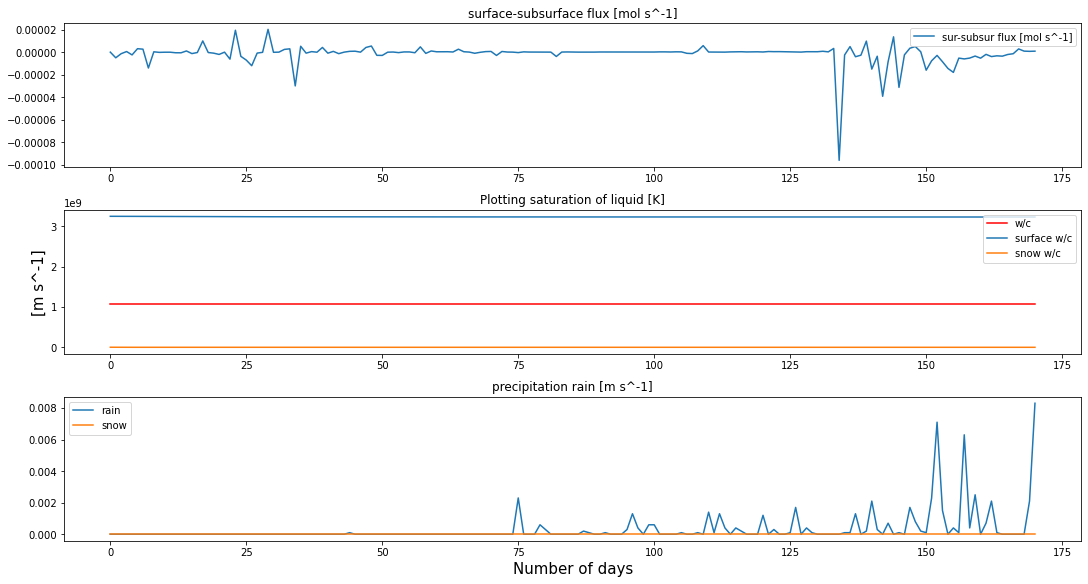

In [16]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('surface-subsurface flux [mol s^-1]')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_sim['surface-subsurface flux [mol s^-1]'],label='sur-subsur flux [mol s^-1]')
f2_ax2.legend()
f2_ax2.set_ylabel('[mol s^-1]',fontsize=15)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_sim['water content [mol]'],'r',label='w/c')
f2_ax2.plot(df_sim['surface water content [mol]'],label='surface w/c')
f2_ax2.plot(df_sim['snow water content [mol]'],label='snow w/c')

f2_ax2.legend()
f2_ax2.set_ylabel('w/c [mol]',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('precipitation rain [m s^-1]')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_sim['precipitation rain [m s^-1]'],label='rain')
f2_ax3.plot(df_sim['precipitation snow [m s^-1]'],label='snow')

f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax2.set_ylabel('[m s^-1]',fontsize=15)
f2_ax3.legend()